<a id="toc"></a>

# <u>Table of Contents</u>
1.) [Imports](#imports)  
2.) [Load data](#load)  
3.) [Quick Overview](#overview)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.1.) [Boring columns](#boring)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.2.) [Missing Values](#nan)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.3.) [Fill in missing values](#fillnan)  
&nbsp;&nbsp;&nbsp;&nbsp; 3.4.) [Correlation Map](#corr)  
4.) [Target varable - ](#target)  
5.) [Categorical columns](#cat)  
&nbsp;&nbsp;&nbsp;&nbsp; 5.1.) [Unique values](#cat_unique)  
&nbsp;&nbsp;&nbsp;&nbsp; 5.2.) [Get dummies](#cat_dummies)  
6.) [Numerical columns](#num)  
7.) [Miscellaneous data processing](#misc)  
8.) [Modeling](#model)  
&nbsp;&nbsp;&nbsp;&nbsp; 8.1.) [Machine learning imports](#ml_imports)  
&nbsp;&nbsp;&nbsp;&nbsp; 8.2.) [Meta modeling](#meta_model)  
9.) [Feature Importance](#feat_importance)  

---
<a id="imports"></a>

# [^](#toc) <u>Imports</u>

In [8]:
### Standard imports
import pandas as pd
import numpy as np

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

# Progress bar
from tqdm import tqdm

# Time keeper
import time

# Datetime library
from datetime import datetime

### Removes warnings from output
import warnings
warnings.filterwarnings('ignore')

### Styling helpers

In [2]:
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False):
    
    # Plots the data
    fig = sns.barplot(data.values, data.index, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(data.values):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

    
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

### Helpers

In [11]:
def get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

def factorize_df(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df

# Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in tqdm(df.columns):
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

def load(filename):
    df = pd.read_csv(DATA_PATH + filename)
    return df

DATA_PATH = "../../data/santander/"

---
<a id="load"></a>

# [^](#toc) <u>Load data</u>

In [35]:
# Load data
train = load("train_r.csv")
test  = load("test_r.csv")

print("Shape of train data:", train.shape, "\n")
print("Shape of test data:" , test.shape,  "\n")

### Categorical columns
cat_columns = [col for col in train.columns if train[col].dtype == object]
print("{}Categorical columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_columns))

### Numerical columns
num_columns = [col for col in train.columns if train[col].dtype != object]
print("{}Numerical columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_columns))

train.head()

Shape of train data: (4459, 4738) 

Shape of test data: (49342, 4737) 

Categorical columns:
ID
Numerical columns:
Unnamed: 0 --- target --- 48df886f9 --- 0deb4b6a8 --- 34b15f335 --- a8cb14b00 --- 2f0771a37 --- 30347e683 --- d08d1fbe3 --- 6ee66e115 --- 20aa07010 --- dc5a8f1d8 --- 11d86fa6a --- 77c9823f2 --- 8d6c2a0b2 --- 4681de4fd --- adf119b9a --- cff75dd09 --- 96f83a237 --- b8a716ebf --- 6c7a4567c --- 4fcfd2b4d --- f3b9c0b95 --- 71cebf11c --- d966ac62c --- 68b647452 --- c88d108c9 --- ff7b471cd --- 0d866c3d7 --- bc3f77679 --- bd8f989f1 --- 0eff5bf95 --- 22ed6dba3 --- 92b13ebba --- 233c7c17c --- 2cb4d123e --- 87ffda550 --- 822e49b95 --- 316b978cd --- d04e16aed --- 5d5c5ce6d --- ec863cb52 --- 11ad148bd --- ea18d720e --- 408d86ce9 --- 69d8b4020 --- b0868a049 --- 80b14398e --- ecdef52b2 --- c36bcacc5 --- 151d318cd --- ab0cddb90 --- 2d6bd8275 --- dfdf4b580 --- c87722678 --- a8c320153 --- a04684f1f --- fa977f17b --- feed9d437 --- 645b47cde --- 7298ca1ef --- d80abf8bc --- 654dd8a3b --- 7fc39

,Unnamed: 0,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [13]:
test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
<a id="overview"></a>

# [^](#toc) <u>Quick Overview</u>

### Split into id, target, and predictors

In [27]:
train_y  = train.target
train_x  = train.drop(["ID", "target"], axis=1)

test_id  = test.ID
test_x   = test.drop(["ID"], axis=1)

### Combine predictors
full = pd.concat([train_x, test_x])
train_N = len(train_x)

# # Remove skew by putting all values to the power (1/5)
train_y  = np.power(train_y, 0.20)

---
<a id="target"></a>

# [^](#toc) <u>Target varable</u>

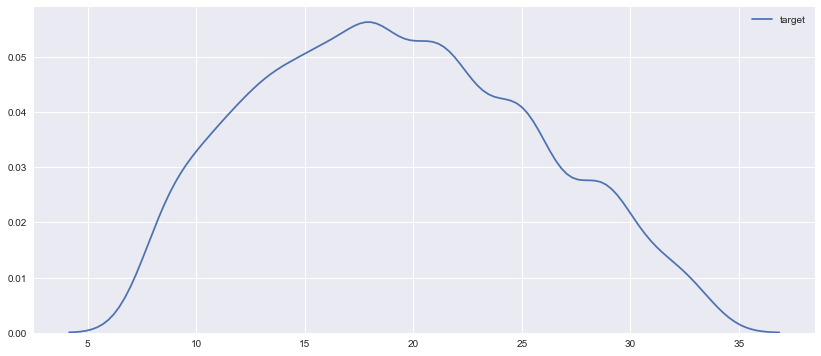

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
sns.kdeplot(train_y);

<a id="boring"></a>

### [^](#toc) Boring columns

In [33]:
drop_cols = list()
for col in train_x.columns:
    unique_vals = train_x[col].unique()
    if len(unique_vals) == 1:
        drop_cols.append(col)
        
train.drop(drop_cols, axis=1, inplace=True)
test.drop(drop_cols, axis=1, inplace=True)

train.to_csv("../../data/santander/train_r.csv")
test.to_csv("../../data/santander/test_r.csv")

<a id="nan"></a>

### [^](#toc) Missing values

In [30]:
temp = train_x.isnull().sum()
temp[temp > 0].sort_values().head()

Series([], dtype: int64)

#### Drop all unneeded columns

In [7]:
drop_columns = [col for col in train_x.columns if all(train_x[col].isnull())]
print("Dropping:", " --- ".join(drop_columns))
train_x = train_x.drop(drop_columns, axis=1)

# Look at missing values again
temp = train_x.isnull().sum()
temp[temp > 0]

Dropping: 


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<a id="fillnan"></a>

### [^](#toc) Fill in missing values

In [8]:
# Put "NaN" for all categorical missing values
categorical_cols = [col for col in train_x.columns if train_x[col].dtype == object]
for col in categorical_cols:
    train_x[col] = train_x[col].fillna("NaN")

# Put median for missing values in numeric columns and create flag for missing values
numerical_cols = [col for col in train_x.columns if any(train_x[col].isnull()) and train_x[col].dtype != object]
for col in numerical_cols:
    train_x[col + "_nan"] = train_x[col].map(lambda x: 1 if np.isnan(x) else 0)
    train_x[col]          = train_x[col].fillna(train_x[col].median())
    
sum(train_x.isnull().sum())

0

<a id="corr"></a>

### [^](#toc) Correlation Map

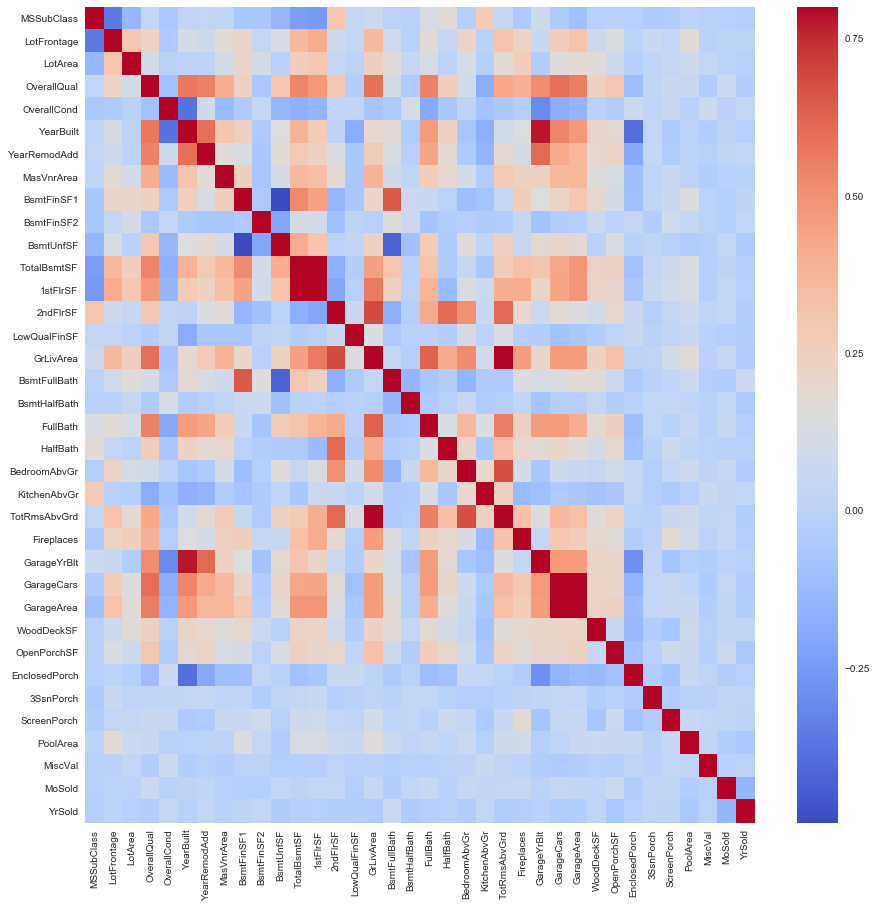

In [9]:
f, ax = plt.subplots(figsize=(15, 15))

cols = [col for col in train_x.columns if "_nan" not in col]
_ = sns.heatmap(train_x[cols].corr(), vmax=.8, cmap="coolwarm")

---
<a id="cat"></a>

# [^](#toc) <u>Categorical columns</u>

<a id="cat_unique"></a>

### [^](#toc) Unique values

In [11]:
cat_cols = [col for col in train_x.columns if train_x[col].dtype == object]
for col in cat_cols:
    print(col, len(train_x[col].unique()))

MSZoning 5
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 5
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinType2 7
Heating 6
HeatingQC 5
CentralAir 2
Electrical 6
KitchenQual 4
Functional 7
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageQual 6
GarageCond 6
PavedDrive 3
PoolQC 4
Fence 5
MiscFeature 5
SaleType 9
SaleCondition 6


<a id="cat_dummies"></a>

### [^](#toc) Get dummies

To use the categorical columns for modeling, I'm going to create dummy variables for all the categorical column values

In [12]:
train_x = pd.get_dummies(train_x)
train_x.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


---
<a id="num"></a>

# [^](#toc) <u>Numerical columns</u>

[]

---
<a id="misc"></a>

# [^](#toc) <u>Miscellaneous data processing</u>

In [ ]:
### Separate into train and test
train_x = full[:train_N]
test_x  = full[train_N:]

---
<a id="model"></a>

# [^](#toc) <u>Modeling</u>

<a id="ml_imports"></a>

### [^](#toc) Machine learning imports

(Click here for different scoring metrics)

<div hidden>

Different options for the `scoring` variable in `cross_val_score`

'accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score'

</div>

In [33]:
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, roc_curve, auc
from sklearn.svm import SVR

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

SCORING = "Root Mean Square Error"

def cv_rmsle(model, x, y, n_folds=5):
    kf = KFold(n_folds, shuffle=True, random_state=17).get_n_splits(x)
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse
    
def cv_score(model):
    kf = KFold(n_folds, shuffle=True, random_state=17).get_n_splits(train_x.values)
    rmse = cross_val_score(model, train_x.values, train_y, scoring=SCORING, cv=kf)
    return rmse

<a id="model_eval"></a>

### [^](#toc) Many model evaluation

This just gives an idea of what model will be the best performer.

In [23]:
plt.figure(figsize=(14, 7))

# Modeling step Test differents algorithms 
models = [
            BayesianRidge(),
            ElasticNet(random_state = 17),
            GradientBoostingRegressor(random_state = 17),
            Lasso(random_state = 17),
    
            LassoLarsIC(),
            LGBMRegressor(random_state = 17),
            LinearRegression(),
            RandomForestRegressor(random_state = 17),
    
            SVR(),
            XGBRegressor(random_state = 17)
]

cv_results = [cv_rmsle(model) for model in models]

cv_means = [cv_result.mean() for cv_result in cv_results]
cv_std = [cv_result.std() for cv_result in cv_results]

cv_results = pd.DataFrame({
                        "CrossValMeans": cv_means,
                        "CrossValerrors": cv_std,
                        "Algorithm":[
                            "BayesianRidge",
                            "ElasticNet",
                            "GradientBoosting",
                            "Lasso",
                            
                            "LassoLarsIC",
                            "LGBM",
                            "LinearRegression",
                            "RandomForest",
                            
                            "SVR",
                            "XGB"
                        ]})

sns.barplot("CrossValMeans","Algorithm", data=cv_results, palette="Set3", orient="h", **{'xerr':cv_std})
plt.xlabel(SCORING)
_ = plt.title("Cross validation scores")

### Initializing different models

In [16]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

<a id="meta_model"></a>

### [^](#toc) Meta modeling

In [41]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, x, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_  = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=17)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        oof_predictions = np.zeros(  (len(x), len(self.base_models))  )
        
        for i, model in enumerate(self.base_models):
            for train_i, val_i in kfold.split(x, y):
                
                # Fit model
                instance = clone(model)
                instance.fit(x[train_i], y[train_i])
                
                # Append to base models
                self.base_models_[i].append(instance)
                
                # Append predictions
                predictions               = instance.predict(x[val_i])
                oof_predictions[val_i, i] = predictions
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(oof_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, x):
        meta_features = (
            np.column_stack(
                [
                    np.column_stack(
                                        [model.predict(x) for model in base_models]
                                    ).mean(axis=1)
                    for base_models in self.base_models_ 
                ]
            )
        )
        return self.meta_model_.predict(meta_features)

### Creating the meta model

In [43]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)
score = cv_rmsle(stacked_averaged_models, train_x.values, train_y)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

---
<a id="predictions"></a>

# [^](#toc) <u>Predictions</u>

In [44]:
stacked_averaged_models.fit(train_x.values, train_y)
predictions = stacked_averaged_models.predict(test_x)

# Undo earlier log1p
predictions = np.expm1(predictions)

ValueError: could not convert string to float: 'Normal'

---
<a id="feat_importance"></a>

# [^](#toc) <u>Feature Importance</u>

Runs an Light Gradient Booster on a sample of the data and determines the data's most important features.

#### Most important

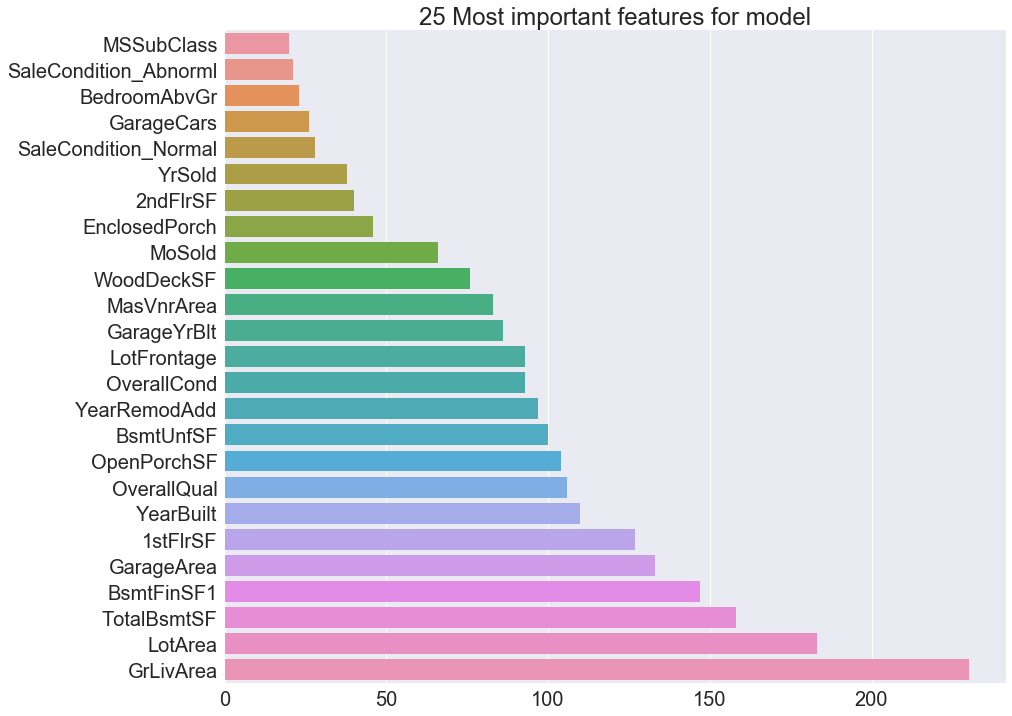

In [21]:
# Setup Extra Trees model
lgb_model = LGBMRegressor()
lgb_model.fit(train_x[:10000], train_y[:10000])

# Get important features
x, y = (list(x) for x in zip(*sorted(zip(lgb_model.feature_importances_, train_x.columns), 
                                                            reverse = False)))

### Styling
sns.set(font_scale=2)
plt.figure(figsize=(14, 12))
plt.title("25 Most important features for model")

# Plot important features
_ = sns.barplot(x[-25:], y[-25:])

#### Least Important

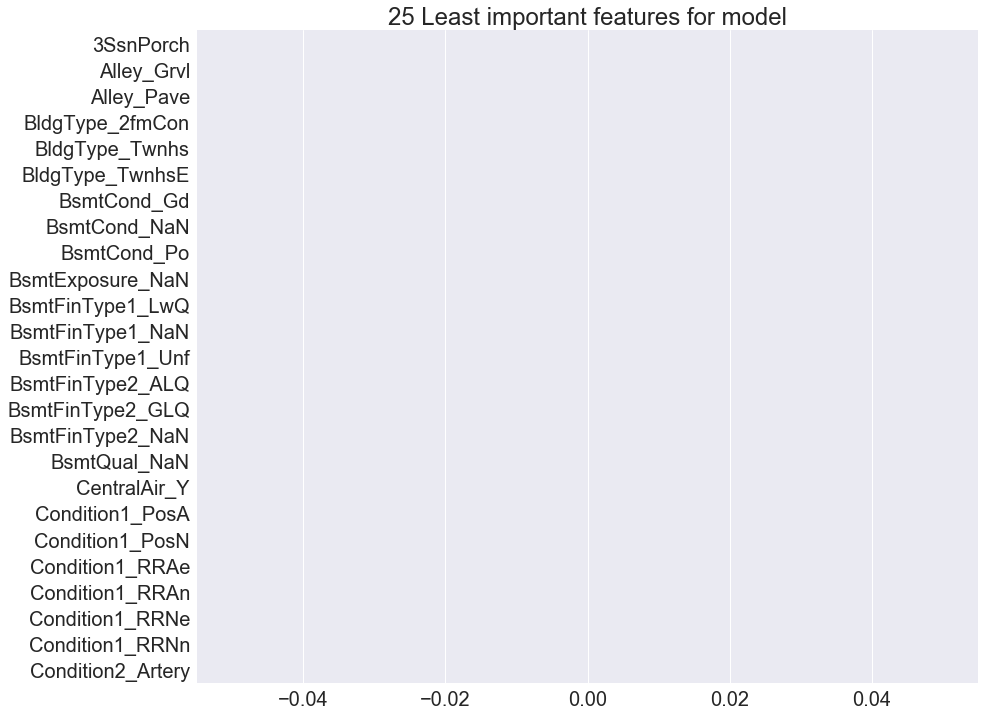

In [22]:
# Setup Extra Trees model
lgb_model = LGBMRegressor()
lgb_model.fit(train_x[:10000], train_y[:10000])

# Get important features
x, y = (list(x) for x in zip(*sorted(zip(lgb_model.feature_importances_, train_x.columns), 
                                                            reverse = False)))

### Styling
sns.set(font_scale=2)
plt.figure(figsize=(14, 12))
plt.title("25 Least important features for model")

# Plot important features
_ = sns.barplot(x[:25], y[:25])